# Titanic Data Analysis

## Data Cleaning
- Filled missing ages with the median age.
- Filled missing embarked locations with the most common value.
- Dropped the 'Cabin' column due to many missing values.

## Key Findings
- Women had a higher survival rate than men.
- Passengers in first class had a higher survival rate than those in second and third classes.
- Survival rate was generally higher for younger passengers.

## Visualizations
- Bar Plot of Survival by Class
- Histogram of Age Distribution
- Pie Chart of Survival Distribution


In [1]:
import pandas as pd

# Load the Titanic dataset
train_df = pd.read_csv('train.csv')

# Show the first few rows of the dataset
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Clean the Data

In [2]:
# Fill missing ages with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing embarked values with the most common one
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column because it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)


C:\Users\Maaz khan\AppData\Local\Temp\ipykernel_6620\482870005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Maaz khan\AppData\Local\Temp\ipykernel_6620\482870005.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [3]:
# Convert 'Sex' to numbers (0 for male, 1 for female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numbers (C=0, Q=1, S=2)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


Explore the Data

In [ ]:
# Survival rate by gender
survival_by_gender = train_df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", survival_by_gender)

# Survival rate by class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
print("Survival rate by class:\n", survival_by_class)

In [4]:
# Create age groups
age_groups = pd.cut(train_df['Age'], bins=[0, 18, 30, 50, 80])

# Survival rate by age group
survival_by_age = train_df.groupby(age_groups)['Survived'].mean()
print("Survival rate by age group:\n", survival_by_age)


Survival rate by age group:
 Age
(0, 18]     0.503597
(18, 30]    0.331096
(30, 50]    0.423237
(50, 80]    0.343750
Name: Survived, dtype: float64


C:\Users\Maaz khan\AppData\Local\Temp\ipykernel_6620\2326852947.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = train_df.groupby(age_groups)['Survived'].mean()


Visualize the Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


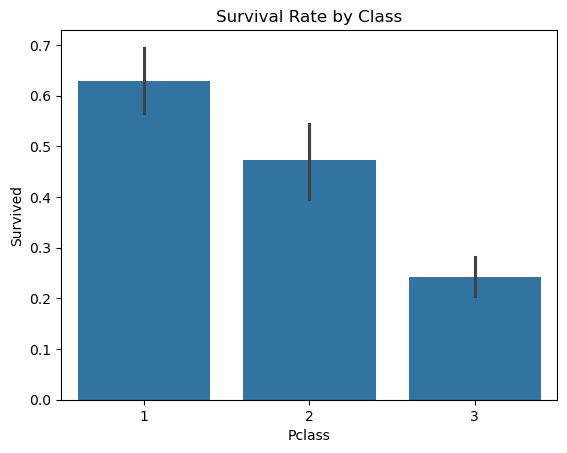

In [6]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Class')
plt.show()


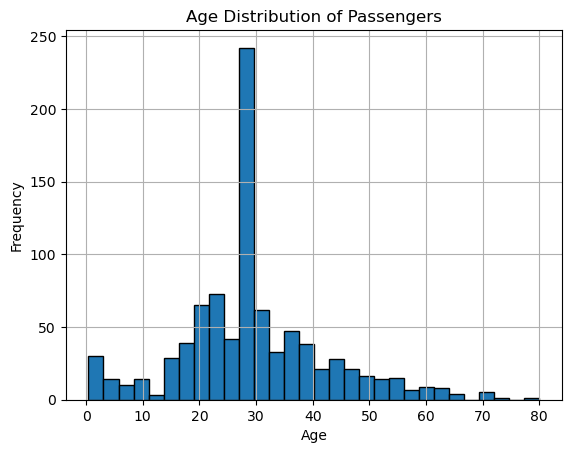

In [7]:
train_df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


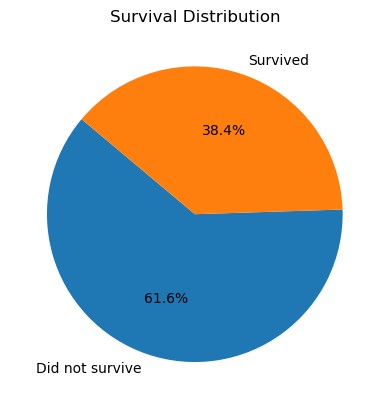

In [8]:
survival_counts = train_df['Survived'].value_counts()
plt.pie(survival_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.show()
